<a href="https://colab.research.google.com/github/gopika20nair/Solubility-Prediction-of-drug-compounds-ML-Demo/blob/main/RanF(MF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 16.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AquaSol_Morgan_Fingerprints.csv to AquaSol_Morgan_Fingerprints.csv


In [ ]:
data = pd.read_csv("AquaSol_Morgan_Fingerprints.csv")

In [ ]:
print(data.head())

   FP_0  FP_1  FP_2  FP_3  FP_4  FP_5  FP_6  FP_7  FP_8  FP_9  ...  FP_2039  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0   
3   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...      0.0   

   FP_2040  FP_2041  FP_2042  FP_2043  FP_2044  FP_2045  FP_2046  FP_2047  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   Solubility  
0   -3.616127  
1   -3.254767  
2   -2.177078 

In [ ]:
X = data.iloc[:, :-1]
y = data['Solubility']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.6455631293226174
Root Mean Squared Error: 1.282795045719548
Mean Absolute Error: 0.9281133280266433
R² Score: 0.6966505568089278


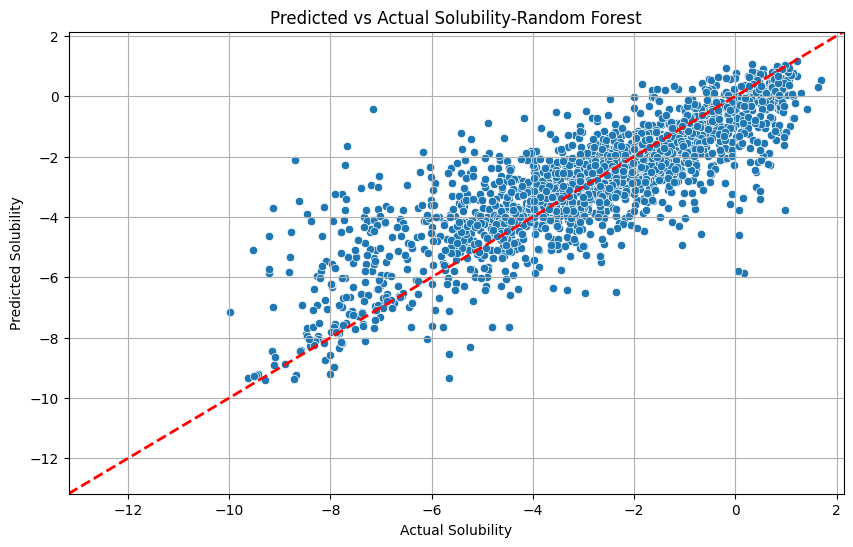

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('Predicted vs Actual Solubility-Random Forest')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()
plt.show()